In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

---

#### 1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800]. Найдите ее среднее значение и дисперсию.

In [2]:
a = 200
b = 800

mean = (a + b)/2.0
print(f"среднее значение: {mean:4.2f}")

variance = ((a + b)**2)/12.0
print(f"дисперсия: {variance:6.2f}")

среднее значение: 500.00
дисперсия: 83333.33


---

#### 2. О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

In [3]:
a = .5
variance = .2

b = np.sqrt(variance * 12) + a
print(f"b: {b:4.2f}")

mean = (a + b)/2
print(f"среднее значение: {mean:4.2f}")

b: 2.05
среднее значение: 1.27


---

#### 3. Непрерывная случайная величина X распределена нормально и задана плотностью распределения f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-((x+2)**2) / 32)) Найдите: а). M(X) б). D(X) в). std(X) (среднее квадратичное отклонение)

In [4]:
sigma = 4
variance = 16
mean = -2

---

#### 4. Рост взрослого населения города X имеет нормальное распределение. Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см. Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: а). больше 182 см б). больше 190 см в). от 166 см до 190 см г). от 166 см до 182 см д). от 158 см до 190 см е). не выше 150 см или не ниже 190 см ё). не выше 150 см или не ниже 198 см ж). ниже 166 см.

In [5]:
def normal_dist(x:float, mu: float, sigma:float) -> float:
    return (1 / (sigma * np.sqrt(2*np.pi))) * (np.exp(-((x-mu)**2) / (2*(sigma**2)))) 

def zet(x:float, mu: float, sigma:float) -> float:
    return (x - mu)/sigma

mean_height = 172.0
sigma = 8.0

nrm = sps.norm()

zepo_shift = normal_dist(x=mean_height, mu=mean_height, sigma=sigma)

def interpolation(x: float) -> float:
    scale_x = x/(zepo_shift/10000)
    return scale_x * 1/10000


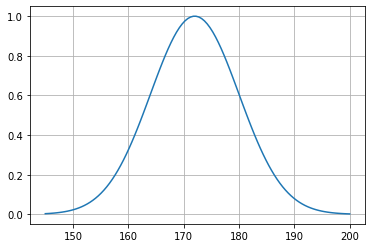

In [6]:
x = np.linspace(145, 200, (200-145)*2)

plt.plot(x, interpolation(normal_dist(x, mean_height, sigma)))

plt.grid(True)
plt.show()


больше 182 см

In [7]:
p = normal_dist(x=182, mu=mean_height, sigma=sigma)
z = zet(x=182, mu=mean_height, sigma=sigma)
cdf = nrm.cdf(z)
print(f"Ф({z}) = {cdf:.4f}")
probability = 1 - cdf
print(f"probability: {probability:.4f}")

Ф(1.25) = 0.8944
probability: 0.1056


больше 190 см

In [8]:
p = normal_dist(x=190, mu=mean_height, sigma=sigma)
z = zet(x=190, mu=mean_height, sigma=sigma)
cdf = nrm.cdf(z)
print(f"Ф({z}) = {cdf:.4f}")
probability = 1 - cdf
print(f"probability: {probability:.4f}")

Ф(2.25) = 0.9878
probability: 0.0122


от 166 см до 190 см

In [9]:
z1 = zet(x=190, mu=mean_height, sigma=sigma)
z2 = zet(x=166, mu=mean_height, sigma=sigma)
cdf_z1 = nrm.cdf(z1)
cdf_z2 = nrm.cdf(z2)
probability = cdf_z1 - cdf_z2

print(f"Ф({z1})-Ф({z2}) = {cdf_z1:.4f}-{cdf_z2:.4f} = {probability:.4f}")


Ф(2.25)-Ф(-0.75) = 0.9878-0.2266 = 0.7611


от 166 см до 182 см

In [10]:
z1 = zet(x=182, mu=mean_height, sigma=sigma)
z2 = zet(x=166, mu=mean_height, sigma=sigma)
cdf_z1 = nrm.cdf(z1)
cdf_z2 = nrm.cdf(z2)
probability = cdf_z1 - cdf_z2

print(f"Ф({z1})-Ф({z2}) = {cdf_z1:.4f}-{cdf_z2:.4f} = {probability:.4f}")


Ф(1.25)-Ф(-0.75) = 0.8944-0.2266 = 0.6677


от 158 см до 190 см

In [11]:
z1 = zet(x=190, mu=mean_height, sigma=sigma)
z2 = zet(x=158, mu=mean_height, sigma=sigma)
cdf_z1 = nrm.cdf(z1)
cdf_z2 = nrm.cdf(z2)
probability = cdf_z1 - cdf_z2

print(f"Ф({z1})-Ф({z2}) = {cdf_z1:.4f}-{cdf_z2:.4f} = {probability:.4f}")


Ф(2.25)-Ф(-1.75) = 0.9878-0.0401 = 0.9477


не выше 150 см или не ниже 190 см

In [12]:
z1 = zet(x=190, mu=mean_height, sigma=sigma)
z2 = zet(x=150, mu=mean_height, sigma=sigma)
cdf_z1 = nrm.cdf(z1)
cdf_z2 = nrm.cdf(z2)
probability = 1 - (cdf_z1 - cdf_z2)

print(f"Ф({z1})-Ф({z2}) = {cdf_z1:.4f}-{cdf_z2:.4f} = {probability:.4f}")


Ф(2.25)-Ф(-2.75) = 0.9878-0.0030 = 0.0152


не выше 150 см или не ниже 198 см

In [13]:
z1 = zet(x=198, mu=mean_height, sigma=sigma)
z2 = zet(x=150, mu=mean_height, sigma=sigma)
cdf_z1 = nrm.cdf(z1)
cdf_z2 = nrm.cdf(z2)
probability = 1 - (cdf_z1 - cdf_z2)

print(f"Ф({z1})-Ф({z2}) = {cdf_z1:.4f}-{cdf_z2:.4f} = {probability:.4f}")


Ф(3.25)-Ф(-2.75) = 0.9994-0.0030 = 0.0036


ниже 166 см

In [14]:
z = zet(x=166, mu=mean_height, sigma=sigma)
cdf = nrm.cdf(z)
print(f"Ф({z}) = {cdf:.4f}")
probability = cdf
print(f"probability: {probability:.4f}")

Ф(-0.75) = 0.2266
probability: 0.2266


---

#### 5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

In [15]:
man_height = 190.0
mean_height = 178.0
sigma = np.sqrt(25)

zet(x=man_height, mu=mean_height, sigma=sigma)

2.4